In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = np.array([[2100, 3],[1600, 2],[2400, 4],[1400, 2],[3000, 4],[2100,2]])
y = np.array([400, 330, 369, 290, 540,350])
m, n = X.shape

In [9]:
# J(w,b) = 1/2m  ∑ (Y-y)**2
# Y = wx+b
def cost_function(X, y, w, b):
    m = len(y)
    cost = 0
    for i in range(m):
        pred = np.dot(X[i], w) + b
        cost += (pred - y[i]) ** 2
    return cost / (2 * m)

In [10]:

def compute_gradient(X, y, w, b):
    m, n = X.shape
    dw = np.zeros(n)
    db = 0
    for i in range(m):
        pred = np.dot(X[i], w) + b
        error = pred - y[i]
        dw += error * X[i]
        db += error
    return dw / m, db / m

In [11]:
def gradient_descent(X, y, w, b, alpha, iterations):
    for i in range(iterations):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        if i % 1000 == 0:
            cost = cost_function(X, y, w, b)
            print(f"Iteration {i}: Cost {cost:.2f}, w = {w}, b = {b:.2f}")
    return w, b

In [12]:
w_init = np.zeros(n)
b_init = 0
alpha = 1e-8
iterations = 10000

w_final, b_final = gradient_descent(X, y, w_init, b_init, alpha, iterations)
print(f"\nTrained Parameters: w = {w_final}, b = {b_final}")

Iteration 0: Cost 68450.24, w = [8.35766667e-03 1.12933333e-05], b = 0.00
Iteration 1000: Cost 698.16, w = [0.17845518 0.00020333], b = 0.00
Iteration 2000: Cost 698.16, w = [1.78455211e-01 1.64739082e-04], b = 0.00
Iteration 3000: Cost 698.16, w = [1.78455240e-01 1.26146892e-04], b = 0.00
Iteration 4000: Cost 698.16, w = [1.78455270e-01 8.75547961e-05], b = 0.00
Iteration 5000: Cost 698.16, w = [1.78455299e-01 4.89627932e-05], b = 0.00
Iteration 6000: Cost 698.16, w = [1.78455329e-01 1.03708836e-05], b = 0.00
Iteration 7000: Cost 698.16, w = [ 1.78455358e-01 -2.82209326e-05], b = 0.00
Iteration 8000: Cost 698.16, w = [ 1.78455388e-01 -6.68126554e-05], b = 0.00
Iteration 9000: Cost 698.16, w = [ 1.78455418e-01 -1.05404285e-04], b = 0.00

Trained Parameters: w = [ 1.78455447e-01 -1.43957229e-04], b = 0.0005876922593291954


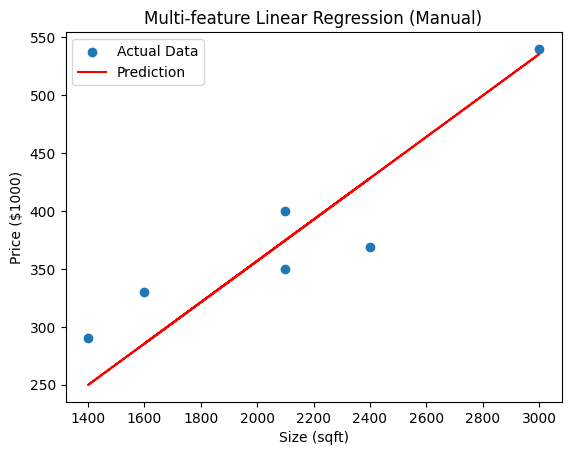

In [13]:
y_pred = X @ w_final + b_final

plt.scatter(X[:, 0], y, label='Actual Data')  # size vs y
plt.plot(X[:, 0], y_pred, color='red', label='Prediction')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($1000)')
plt.title('Multi-feature Linear Regression (Manual)')
plt.legend()
plt.show()

Weights (w): [  0.2765 -93.65  ]
Bias (b): 86.09999999999997
Actual y: [400 330 369 290 540]
Predicted y: [385.8 341.2 375.1 285.9 541. ]


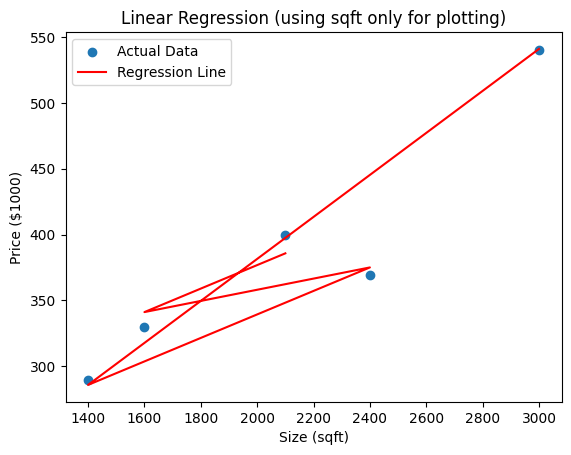

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
X = np.array([[2100, 3],[1600, 2],[2400, 4],[1400, 2],[3000, 4]])
y = np.array([400, 330, 369, 290, 540])

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Print weights and bias
print("Weights (w):", model.coef_)       # w1, w2
print("Bias (b):", model.intercept_)     # b
print("Actual y:", y)
print("Predicted y:", y_pred)

# Plot: only first feature (sqft) vs price
plt.scatter(X[:, 0], y, label='Actual Data')
plt.plot(X[:, 0], y_pred, color='red', label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($1000)')
plt.title('Linear Regression (using sqft only for plotting)')
plt.legend()
plt.show()
